In [18]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#MNIST data downloaded and saved as a dict in data.pickle
with open('data.pickle', 'rb') as handle:
    mnist_dict = pickle.load(handle)

In [19]:
#pre-process images
#linearise from 28*28 pixels to 784 pixels
#standardize images: (x-mean)/standard deviation where x is a pixel and mean/std_dev are calculated for each image

def pre_process(images):
    processed_images = images.reshape(-1, 28*28) # Changing from 2D image to 1D linearised image, each image is 28 x 28
    mean, std = np.mean(processed_images, axis=1), np.std(processed_images, axis=1)
    processed_images = (processed_images - mean.repeat(28*28).reshape(-1,28*28))/std.repeat(28*28).reshape(-1,28*28)
    return processed_images

In [20]:
def get_accuracy(classifier):
    predictions = classifier.predict(mnist_dict['test/images'])
    return accuracy_score(mnist_dict['test/labels'], predictions) * 100

In [21]:
mnist_dict['train/images'] = pre_process(mnist_dict['train/images'])
mnist_dict['test/images'] = pre_process(mnist_dict['test/images'])

Digit 5 Example


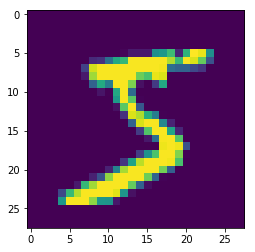

In [22]:
print('Digit {} Example'.format(mnist_dict['train/labels'][0]))
plt.imshow(mnist_dict['train/images'][0].reshape(28,28))

### SVMs

In [120]:
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001,kernel='rbf')#RBF kernel
svm_classifier.fit(mnist_dict['train/images'], mnist_dict['train/labels'])

print ("SVM accuracy is {:.2f}%".format(get_accuracy(svm_classifier)))

SVM accuracy is 97.90%


### Naive-Bayes

In [17]:
#without pre-processing
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB().fit(mnist_dict['train/images'], mnist_dict['train/labels'])

print ("Multinomial Naive-Bayes accuracy is {:.2f}%".format(get_accuracy(NB_classifier)))

Multinomial Naive-Bayes accuracy is 83.65%


In [23]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(mnist_dict['train/images'], mnist_dict['train/labels'])

print ("Gaussian Naive-Bayes accuracy is {:.2f}%".format(get_accuracy(NB_classifier)))

Gaussian Naive-Bayes accuracy is 71.45%


### Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', n_jobs=2)
logistic_classifier.fit(mnist_dict['train/images'], mnist_dict['train/labels'])

print ("Logistic Regression accuracy is {:.2f}%".format(get_accuracy(logistic_classifier)))

Logistic Regression accuracy is 92.61%


### Multi-Layer Perceptron

In [118]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20,))
mlp_classifier.fit(mnist_dict['train/images'], mnist_dict['train/labels'])

print ("MLP Classifier accuracy is {:.2f}%".format(get_accuracy(mlp_classifier)))

MLP Classifier accuracy is 95.13%


### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(min_samples_leaf=20)
tree_classifier.fit(mnist_dict['train/images'], mnist_dict['train/labels'])

print ("Decision Tree accuracy is {:.2f}%".format(get_accuracy(tree_classifier)))

Decision Tree accuracy is 86.81%


In [110]:
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(base_estimator=tree_classifier, n_estimators=5)#ideally use >5 trees
bagging_classifier.fit(mnist_dict['train/images'], mnist_dict['train/labels'])

print ("Bagged Trees classifier accuracy is {:.2f}%".format(get_accuracy(bagging_classifier)))

Bagged Trees classifier accuracy is 88.20%


In [111]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(base_estimator=tree_classifier, n_estimators=5)#ideally use >5 trees
adaboost_classifier.fit(mnist_dict['train/images'], mnist_dict['train/labels'])

print ("Adaboost classifier accuracy is {:.2f}%".format(get_accuracy(adaboost_classifier)))

Adaboost classifier accuracy is 89.38%


### Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(min_samples_leaf=20)
forest_classifier.fit(mnist_dict['train/images'], mnist_dict['train/labels'])

print ("Random Forest classifier accuracy is {:.2f}%".format(get_accuracy(forest_classifier)))

Random Forest classifier accuracy is 93.15%


### Ensemble

In [121]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier([('mlp', mlp_classifier), ('svm', svm_classifier), ('nb', NB_classifier), ('rf', forest_classifier), ('lr', logistic_classifier)])
ensemble.fit(mnist_dict['train/images'], mnist_dict['train/labels'])

print ("Ensemble classifier accuracy is {:.2f}%".format(get_accuracy(ensemble)))

Ensemble classifier accuracy is 96.34%
